# Telecom Churn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tc = pd.read_csv('telecom_churn_data.csv')
pd.options.display.max_columns = 300
pd.options.display.max_rows = 999
pd.options.display.float_format = '{:.2f}'.format

In [3]:
tc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

# Data cleaning and filtering customers

### Imputing the values to filter high value customers

In [4]:
# Imputing the below fields to zero
# Note this was also a suggestion from Upgrad
fields_to_be_imputed_with_0 = ['total_rech_data', 'av_rech_amt_data', 'max_rech_data']

for field in fields_to_be_imputed_with_0:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_0 = field + '_' + month
        tc[field_to_be_imputed_with_0].fillna(0, inplace=True)

### Deriving new variable to filter high value customers

In [5]:
tc['total_rech_amt_good_phase'] = (tc['total_rech_amt_6'] + tc['total_rech_amt_7'] +((tc['total_rech_data_6'] * tc['av_rech_amt_data_6']) +
                                         (tc['total_rech_data_7'] * tc['av_rech_amt_data_7'])))

In [6]:
tc_1 = tc[tc['total_rech_amt_good_phase'] > tc['total_rech_amt_good_phase'].quantile(0.7)]

In [7]:
tc_1.shape

(29953, 227)

### Identifying customers who churn

In [8]:
tc_1.loc[:,'churn'] = 0

tc_1.loc[(tc_1['total_ic_mou_9'] == 0) &
    (tc_1['total_og_mou_9'] == 0) &
    (tc_1['vol_2g_mb_9'] == 0) &
    (tc_1['vol_3g_mb_9'] == 0), ['churn']] = 1

tc_1['churn'].value_counts()

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0    27520
1     2433
Name: churn, dtype: int64

### Removing all the values for the month september

In [9]:
columns_with_9 = [x for x in list(tc_1.columns) if x.endswith('_9')]
tc_1 = tc_1.drop(columns_with_9, axis=1)

# Column with september values
tc_1 = tc_1.drop(['sep_vbc_3g'], axis=1)
tc_1.shape

(29953, 173)

In [10]:
val = pd.DataFrame(tc_1.isnull().sum()).reset_index()
val = val.rename(columns={0:'null_count'})
val[val['null_count'] > 0]

,index,null_count
2,loc_og_t2o_mou,223
3,std_og_t2o_mou,223
4,loc_ic_t2o_mou,223
6,last_date_of_month_7,27
7,last_date_of_month_8,165
11,onnet_mou_6,542
12,onnet_mou_7,536
13,onnet_mou_8,1172
14,offnet_mou_6,542
15,offnet_mou_7,536


In [11]:
# Performs outlier treatment on continuous variables
def handle_outliers(df, column, bins):
    quartile_3, quartile_1 = np.percentile(df[column], [75 ,25])
    inter_quartile_range = quartile_3 - quartile_1
    min_val = quartile_1 - (inter_quartile_range * 1.5)
    max_val = quartile_3 + (inter_quartile_range * 1.5)
    df.loc[df[column] < min_val,column] = df[column].median()
    df.loc[df[column] > max_val,column] = df[column].median()
    df[column+'_bin'] = pd.cut((df[column]),bins)
    return df

# plots the churn impact for the variable
def plot_churn_impact(df, column, label):
    table = pd.DataFrame(df.groupby(column)['churn'].agg(['count','mean']))
    customers_num = table['count'].sum()
    table['fraction'] = (table['count']/customers_num) * 100
    ax = table[['fraction']].plot(kind='bar', legend=False)
    ax2 = ax.twinx()
    ax2.plot(table[['mean']].values, linestyle='-', marker='o', linewidth=2.0, color='red')
    ax.set_xlabel(label,fontweight='bold', fontsize=20)
    ax.set_ylabel('Population Percentage',color="blue",fontweight='bold', fontsize=20)
    ax2.set_ylabel('Percentage Churn',color="red",fontweight='bold', fontsize=20)
    plt.show()

# explores the churn impact and the distribution of the important variables
def explore_vaiables_and_churn(df, column, bins):
    df = handle_outliers(df.copy(),column,bins)
    label = column
    table = pd.DataFrame(df.groupby(column+'_bin')['churn'].agg(['count','mean']))
    customers_num = table['count'].sum()
    table['fraction'] = (table['count']/customers_num) * 100
    ax = table[['fraction']].plot(kind='bar', legend=False)
    ax2 = ax.twinx()
    ax2.plot(table[['mean']].values, linestyle='-', marker='o', linewidth=2.0, color='red')
    ax.set_xlabel(label,fontweight='bold', fontsize=20)
    ax.set_ylabel('Population Percentage',color="blue",fontweight='bold', fontsize=20)
    ax2.set_ylabel('Percentage Churn',color="red",fontweight='bold', fontsize=20)
    plt.show()
    df_gb = df.groupby('churn')
    df_gb.boxplot(column=column)
    plt.show()

### Analyzing only month 6
Let us start by analyzing only the month of June and extrapolate the same analysis to other months as well

In [12]:
# Let us analyze the incoming calls for the month 6
columns = [x for x in list(tc_1.columns) if x.endswith('_6') and 'ic' in x]
columns

['roam_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

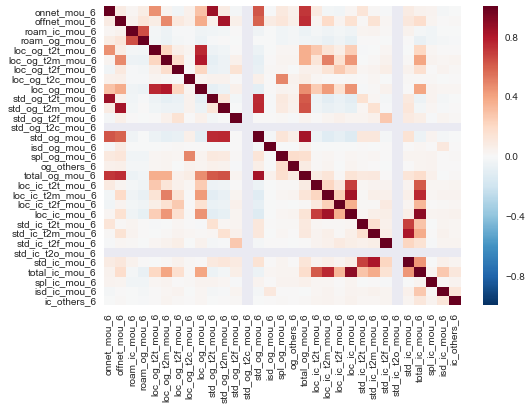

In [13]:
sns.heatmap(tc_1[['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].corr())
plt.show()

### Analyzing all the incoming calls for month of June

In [14]:
# Analyzing all the local incoming calls for month 6
temp = pd.DataFrame(tc_1['loc_ic_mou_6'] -
                    (tc_1['loc_ic_t2t_mou_6'] + tc_1['loc_ic_t2m_mou_6'] +tc_1['loc_ic_t2f_mou_6'])
                   )
print("Analyzing all the local incoming calls for month 6\n", temp.describe())

# Analyzing all the std incoming calls for month 6
temp = pd.DataFrame(tc_1['std_ic_mou_6'] -
             (tc_1['std_ic_t2t_mou_6'] + tc_1['std_ic_t2m_mou_6'] + tc_1['std_ic_t2f_mou_6']+tc_1['std_ic_t2o_mou_6'])
            )
print("\nAnalyzing all the std incoming calls for month 6\n",temp.describe())

# Analyzing total incoming calls for month 6
temp = pd.DataFrame(tc_1['total_ic_mou_6'] -
             (tc_1['loc_ic_mou_6']+ tc_1['std_ic_mou_6']+ tc_1['isd_ic_mou_6']+
              tc_1['spl_ic_mou_6']+ tc_1['ic_others_6'])
            )
print("\nAnalyzing total incoming calls for month 6\n",temp.describe())

Analyzing all the local incoming calls for month 6
              0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.01
50%       0.01
75%       0.01
max       0.02

Analyzing all the std incoming calls for month 6
              0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02

Analyzing total incoming calls for month 6
              0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


### Analyzing all the outgoing calls for month of June

In [15]:
# Let us analyze the outgoing calls for the month 6
columns = [x for x in list(tc_1.columns) if x.endswith('_6') and 'og' in x]
columns

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6']

In [16]:
# Analyzing all the local outgoing calls for month 6
temp = pd.DataFrame(tc_1['loc_og_mou_6'] -
                    (tc_1['loc_og_t2t_mou_6'] + tc_1['loc_og_t2m_mou_6'] +tc_1['loc_og_t2f_mou_6'])
                   )
print("Analyzing all the local outgoing calls for month 6\n",temp.describe())

# Analyzing all the std outgoing calls for month 6
temp = pd.DataFrame(tc_1['std_og_mou_6'] -
             (tc_1['std_og_t2t_mou_6'] + tc_1['std_og_t2m_mou_6'] + tc_1['std_og_t2f_mou_6'])
            )
print("\nAnalyzing all the std outgoing calls for month 6\n",temp.describe())

# Analyzing total outgoing calls for month 6
temp = pd.DataFrame(tc_1['total_og_mou_6'] -
             (tc_1['loc_og_mou_6']+ tc_1['std_og_mou_6']+ tc_1['isd_og_mou_6']+
              tc_1['spl_og_mou_6']+ tc_1['og_others_6'])
            )
print("\nAnalyzing total outgoing calls for month 6\n",temp.describe())

Analyzing all the local outgoing calls for month 6
              0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.02

Analyzing all the std outgoing calls for month 6
              0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02

Analyzing total outgoing calls for month 6
              0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


### Imputing the values for the fields analyzed above

In [17]:
# we see that some of the fields are calculated from the sum of other fields. We can impute these values by zero
# Note that the difference is calculated only for the fields where the fields are not NULL
# Similar analysis holds true for all the months

fields_to_be_imputed_with_0 = ['loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
                               'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou',
                               'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
                               'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
                               'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
                               'og_others', 'total_og_mou',]

for field in fields_to_be_imputed_with_0:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_0 = field + '_' + month
        tc_1[field_to_be_imputed_with_0].fillna(0, inplace=True)


### Dropping the fields with zero variance

In [18]:
print(tc_1['loc_og_t2o_mou'].value_counts())
print(tc_1['std_og_t2o_mou'].value_counts())
print(tc_1['loc_ic_t2o_mou'].value_counts())
print(tc_1['circle_id'].value_counts())
print(tc_1['std_og_t2c_mou_6'].value_counts())
print(tc_1['std_og_t2c_mou_7'].value_counts())
print(tc_1['std_og_t2c_mou_8'].value_counts())
print(tc_1['std_ic_t2o_mou_6'].value_counts())
print(tc_1['std_ic_t2o_mou_7'].value_counts())
print(tc_1['std_ic_t2o_mou_8'].value_counts())

col_to_be_dropped = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','circle_id',
                    'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                     'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

# We see that all the values have zero variance. These fields can be dropped
tc_1 = tc_1.drop(col_to_be_dropped, axis=1)

0.00    29730
Name: loc_og_t2o_mou, dtype: int64
0.00    29730
Name: std_og_t2o_mou, dtype: int64
0.00    29730
Name: loc_ic_t2o_mou, dtype: int64
109    29953
Name: circle_id, dtype: int64
0.00    29953
Name: std_og_t2c_mou_6, dtype: int64
0.00    29953
Name: std_og_t2c_mou_7, dtype: int64
0.00    29953
Name: std_og_t2c_mou_8, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_6, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_7, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_8, dtype: int64


In [19]:
tc_1[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].isnull().sum()

night_pck_user_6    13213
night_pck_user_7    12915
night_pck_user_8    14018
fb_user_6           13213
fb_user_7           12915
fb_user_8           14018
dtype: int64

### Categorical Variables
Creating a new category for missing values as 2 for the fields night_pck_user and fb_user

In [20]:
# For all the night_pck_user and fb_user we will create a new category '2'
# to identify the missing values

fields_to_be_imputed_with_2 = ['night_pck_user', 'fb_user']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        tc_1[field_to_be_imputed_with_2].fillna(2, inplace=True)

Categorical variables cannot be used for PCA analysis. Hence we will replace each category by its ratio of churners

In [21]:
# Creating new fields
# night_pck_user_<month>_churn - contains the mean churn for this category
# fb_user_<month>_churn - contains the mean churn for this category

fields = ['night_pck_user', 'fb_user']
months = ['6','7','8']
for field in fields:
    for month in months:
        field_name = field + '_' + month
        unique_values = list(tc_1[field_name].unique())
        tc_1.loc[:,field_name + '_churn'] = 0
        for value in unique_values:
            mean_value = tc_1.loc[tc_1[field_name] == value, :].groupby(field_name)['churn'].mean().get_value(value)
            mean_value = float("{0:.2f}".format(mean_value))
            tc_1.loc[tc_1[field_name] == value, [field_name + '_churn']] = mean_value
            print((field_name, value), mean_value)

('night_pck_user_6', 0.0) 0.07
('night_pck_user_6', 2.0) 0.1
('night_pck_user_6', 1.0) 0.09
('night_pck_user_7', 0.0) 0.06
('night_pck_user_7', 2.0) 0.11
('night_pck_user_7', 1.0) 0.06
('night_pck_user_8', 0.0) 0.03
('night_pck_user_8', 2.0) 0.14
('night_pck_user_8', 1.0) 0.03
('fb_user_6', 1.0) 0.07
('fb_user_6', 2.0) 0.1
('fb_user_6', 0.0) 0.08
('fb_user_7', 1.0) 0.06
('fb_user_7', 2.0) 0.11
('fb_user_7', 0.0) 0.07
('fb_user_8', 1.0) 0.02
('fb_user_8', 2.0) 0.14
('fb_user_8', 0.0) 0.07


In [22]:
tc_1.shape

(29953, 169)

In [23]:
tc_1[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
      'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
      'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
      'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
      'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
      'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
      'arpu_2g_6','arpu_2g_7','arpu_2g_8',
      'arpu_3g_6','arpu_3g_7','arpu_3g_8']].isnull().sum()

onnet_mou_6          542
onnet_mou_7          536
onnet_mou_8         1172
offnet_mou_6         542
offnet_mou_7         536
offnet_mou_8        1172
roam_ic_mou_6        542
roam_ic_mou_7        536
roam_ic_mou_8       1172
roam_og_mou_6        542
roam_og_mou_7        536
roam_og_mou_8       1172
count_rech_2g_6    13213
count_rech_2g_7    12915
count_rech_2g_8    14018
count_rech_3g_6    13213
count_rech_3g_7    12915
count_rech_3g_8    14018
arpu_2g_6          13213
arpu_2g_7          12915
arpu_2g_8          14018
arpu_3g_6          13213
arpu_3g_7          12915
arpu_3g_8          14018
dtype: int64

In [24]:
# The missing values in the above listed fields indicate that there was no
# minutes used on the specific category. For example - roam_ic_mou_6 is 0 means
# that there were no incoming calls during the customer roaming. Or it is also
# possible that the customer didn't use the phone duriong roaming.

# All these missing values can be imputed with 0
fields_to_be_imputed_with_0 = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
                               'count_rech_2g','count_rech_3g','arpu_2g','arpu_3g']

for field in fields_to_be_imputed_with_0:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_0 = field + '_' + month
        tc_1[field_to_be_imputed_with_0].fillna(0, inplace=True)

### Imputing all the last date value fields

In [25]:
tc_1['last_date_of_month_6'].fillna('6/30/2014', inplace=True)
tc_1['last_date_of_month_6'] = pd.to_datetime(tc_1['last_date_of_month_6'],format='%m/%d/%Y')
tc_1['last_date_of_month_7'].fillna('7/31/2014', inplace=True)
tc_1['last_date_of_month_7'] = pd.to_datetime(tc_1['last_date_of_month_7'],format='%m/%d/%Y')
tc_1['last_date_of_month_8'].fillna('8/31/2014', inplace=True)
tc_1['last_date_of_month_8'] = pd.to_datetime(tc_1['last_date_of_month_8'],format='%m/%d/%Y')

In [26]:
val = pd.DataFrame(tc_1.isnull().sum()).reset_index()
val = val.rename(columns={0:'null_count'})
val[val['null_count'] > 0]

,index,null_count
103,date_of_last_rech_6,73
104,date_of_last_rech_7,98
105,date_of_last_rech_8,582
109,date_of_last_rech_data_6,13213
110,date_of_last_rech_data_7,12915
111,date_of_last_rech_data_8,14018


### Feature Engineering
We are creating a new age variable which indicates the number of days from the latest recharge.

In [27]:
# We are creating the age from the last recharge.
# This will help us in identifying to see if as the age increases, are there chances of churn

fields = ['date_of_last_rech', 'date_of_last_rech_data']
months = ['6','7','8']
high_date = '01/01/2000'

for field in fields:
    for month in months:
        field_name = field + '_' + month
        tc_1[field_name].fillna(high_date, inplace=True)
        
        # Assigning all the missing values to high date which will give a high age
        tc_1[field_name] = pd.to_datetime(tc_1[field_name],format='%m/%d/%Y')
        tc_1['age_' + field_name] = (tc_1['last_date_of_month_8'] - tc_1[field_name]).dt.days
        
tc_1['age_recharge'] = tc_1.loc[:, ['age_date_of_last_rech_6',
                                    'age_date_of_last_rech_7','age_date_of_last_rech_8']].min(axis=1)
tc_1['age_recharge_data'] = tc_1.loc[:, ['age_date_of_last_rech_data_6',
                                    'age_date_of_last_rech_data_7','age_date_of_last_rech_data_8']].min(axis=1)
tc_1['age_recharge_and_data'] = tc_1.loc[:, ['age_recharge', 'age_recharge_data']].min(axis=1)

In [28]:
# Checking the distribution of og_others_8
tc_x = handle_outliers(tc_1.copy(),'og_others_8',4)
tc_x.groupby('og_others_8_bin')['mobile_number'].count()

og_others_8_bin
(-0.001, -0.0005]        0
(-0.0005, 0.0]       29953
(0.0, 0.0005]            0
(0.0005, 0.001]          0
Name: mobile_number, dtype: int64

After treating for the outliers, we see that the variance is very less. This variable can be dropped.

In [29]:
# Dropping the field og_others_8
tc_1 = tc_1.drop('og_others_8',axis=1)

# Exploratory Data Analysis

## Total Recharge Amount
### June

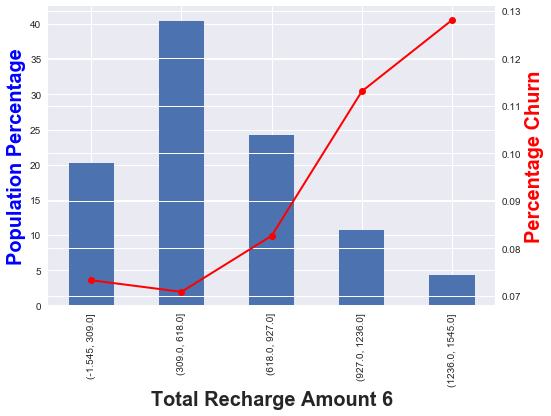

In [30]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_amt_6',5)
plot_churn_impact(tc_x, tc_x.total_rech_amt_6_bin, "Total Recharge Amount 6")

### July

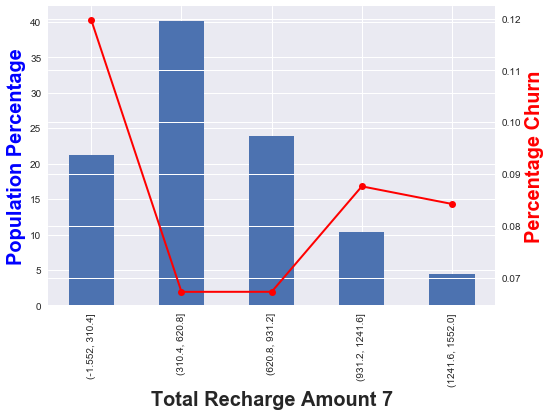

In [31]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_amt_7',5)
plot_churn_impact(tc_x, tc_x.total_rech_amt_7_bin, "Total Recharge Amount 7")

### August

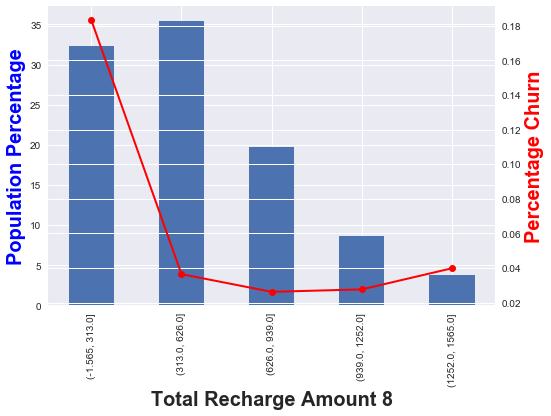

In [32]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_amt_8',5)
plot_churn_impact(tc_x, tc_x.total_rech_amt_8_bin, "Total Recharge Amount 8")

In the cumulative analysis for total recharge amount, we find that customers who do maximum recharge in the month of June had the highest churn rate and customers who fall in low recharge category have highest churn rate in the next 2 months

## Total Recharge Num

### June

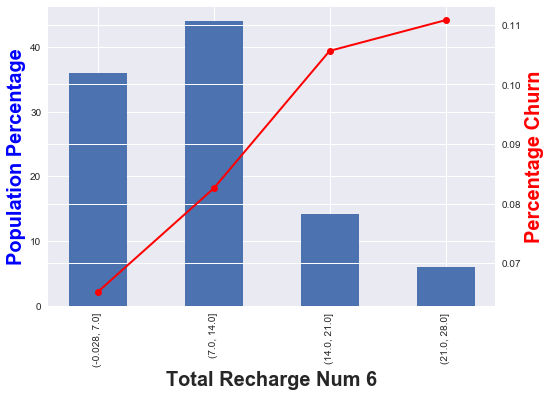

In [33]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_num_6',4)
plot_churn_impact(tc_x, tc_x.total_rech_num_6_bin, "Total Recharge Num 6")

### July

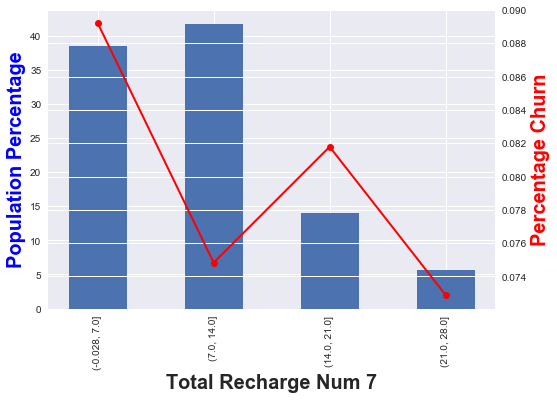

In [34]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_num_7',4)
plot_churn_impact(tc_x, tc_x.total_rech_num_7_bin, "Total Recharge Num 7")

### August

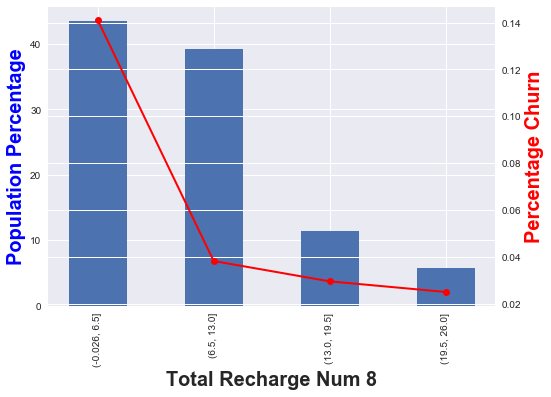

In [35]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_num_8',4)
plot_churn_impact(tc_x, tc_x.total_rech_num_8_bin, "Total Recharge Num 8")

In the cumulative analysis of recharge num, we find that most of the people who recharge the highest in the month of June have the highest churn rate and customers who fall in low recharge category have highest churn rate in the next 2 months

## ARPU

### June

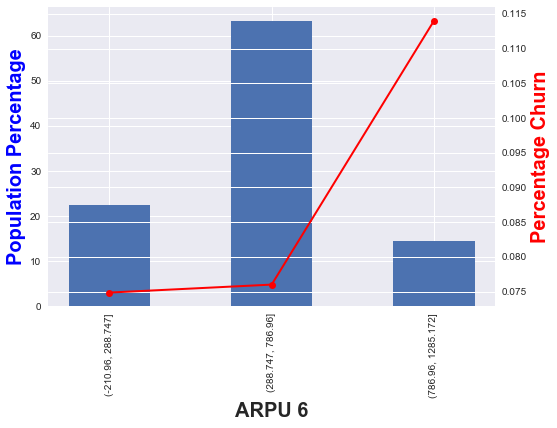

In [36]:
tc_x = handle_outliers(tc_1.copy(),'arpu_6',3)
plot_churn_impact(tc_x, tc_x.arpu_6_bin, "ARPU 6")

### July

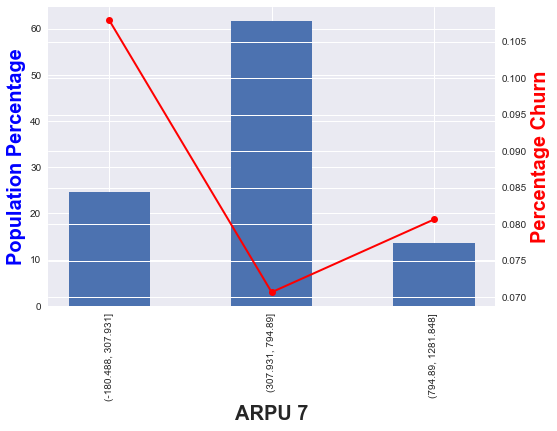

In [37]:
tc_x = handle_outliers(tc_1.copy(),'arpu_7',3)
plot_churn_impact(tc_x, tc_x.arpu_7_bin, "ARPU 7")

### August

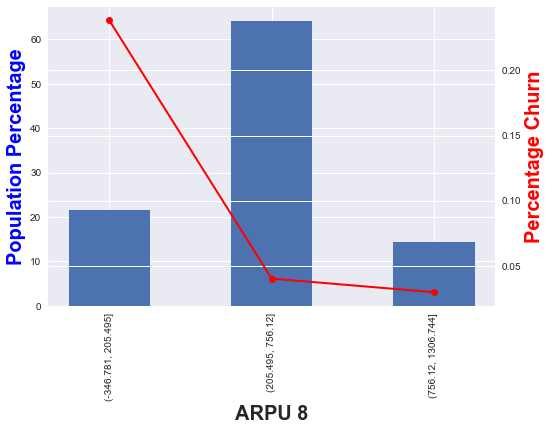

In [38]:
tc_x = handle_outliers(tc_1.copy(),'arpu_8',3)
plot_churn_impact(tc_x, tc_x.arpu_8_bin, "ARPU 8")

In the cumulative analysis of arpu, we find that most of the people who highest arpu in the month of June have the highest churn rate and customers who fall in low arpu category have highest churn rate in the next 2 months

## Average Recharge Amount Data

### June

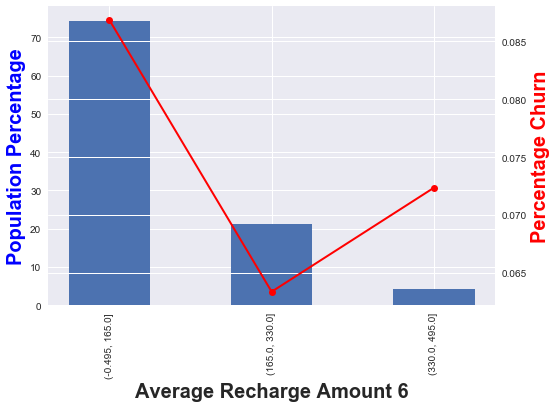

In [39]:
tc_x = handle_outliers(tc_1.copy(),'av_rech_amt_data_6',3)
plot_churn_impact(tc_x, tc_x.av_rech_amt_data_6_bin, "Average Recharge Amount 6")

### July

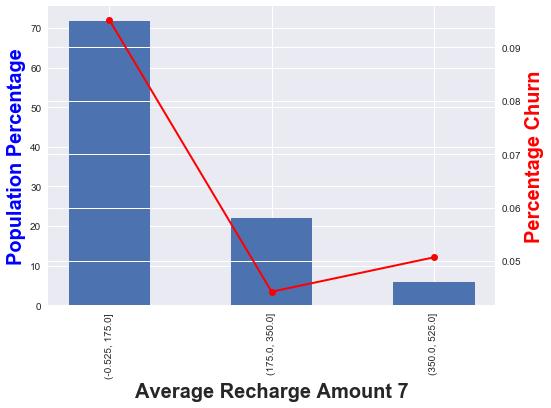

In [40]:
tc_x = handle_outliers(tc_1.copy(),'av_rech_amt_data_7',3)
plot_churn_impact(tc_x, tc_x.av_rech_amt_data_7_bin, "Average Recharge Amount 7")

### August

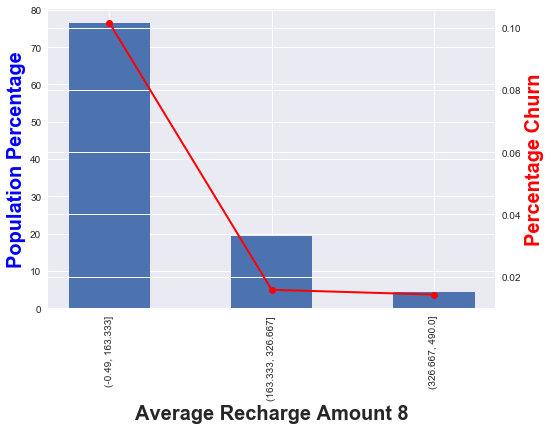

In [41]:
tc_x = handle_outliers(tc_1.copy(),'av_rech_amt_data_8',3)
plot_churn_impact(tc_x, tc_x.av_rech_amt_data_8_bin, "Average Recharge Amount 8")

In the cumulative analysis of average recharge amount for data, we find that the people who fall in the low recharge category are the people who churn significantly. This could be possible that these are the people who have dual sim phones and are avways looking for better data offers

## Total Recharge Data Num

### June

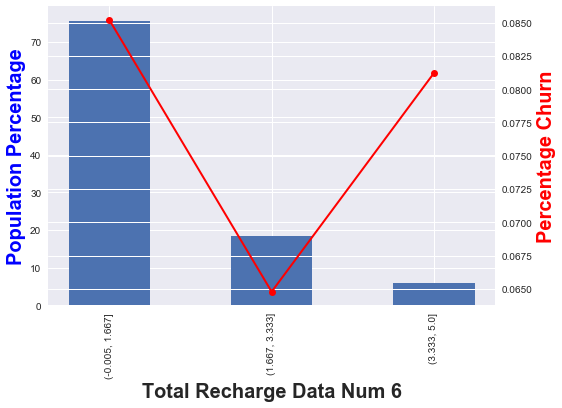

In [42]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_data_6',3)
plot_churn_impact(tc_x, tc_x.total_rech_data_6_bin, "Total Recharge Data Num 6")

### July

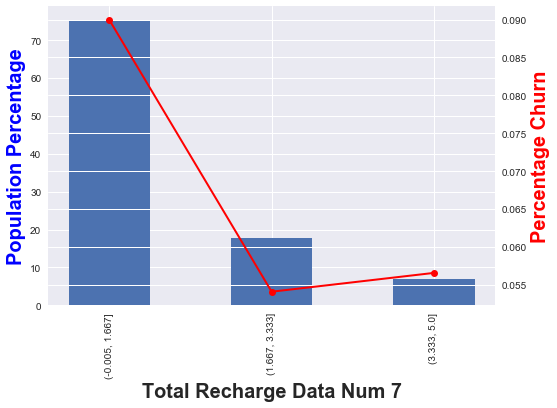

In [43]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_data_7',3)
plot_churn_impact(tc_x, tc_x.total_rech_data_7_bin, "Total Recharge Data Num 7")

### August

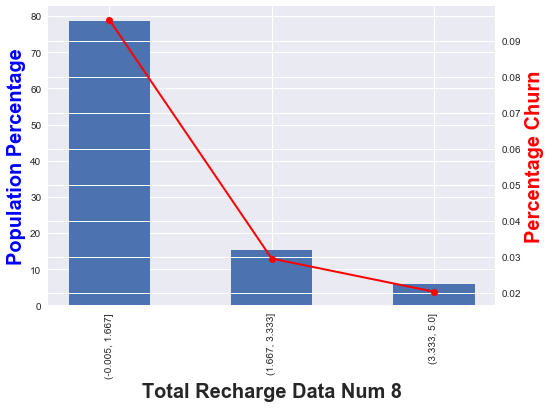

In [44]:
tc_x = handle_outliers(tc_1.copy(),'total_rech_data_8',3)
plot_churn_impact(tc_x, tc_x.total_rech_data_8_bin, "Total Recharge Data Num 8")

In the cumulative analysis of total number of recharge for data, we find that the people who fall in the low recharge category are the people who churn significantly. This could be possible that these are the people who have dual sim phones and are avways looking for better data offers. This behaviour is similar to that of rechrage amount

## Age of recharge

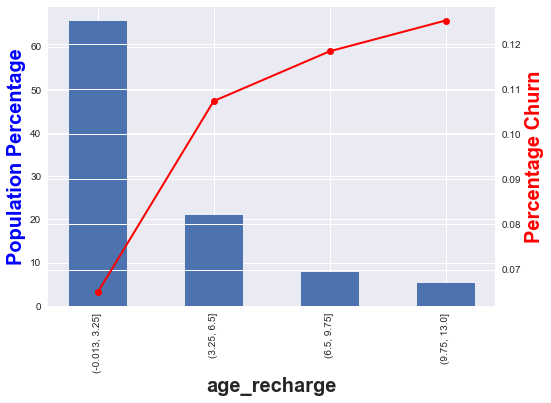

In [45]:
tc_x = handle_outliers(tc_1.copy(),'age_recharge',4)
plot_churn_impact(tc_x, tc_x.age_recharge_bin, "age_recharge")

As expected, higher the age of the latest recharge, higher is the churn of the customer.

# Predictor for the Churn

In [46]:
from sklearn.model_selection import train_test_split

date_fields = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
               'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
# Putting feature variable to X
X = tc_1.drop(['churn','mobile_number']+date_fields,axis=1)

# Putting response variable to y
y = tc_1['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

## Lets calculate the churn rate to check if the classes are balanced in the dataset

In [47]:

churn = (sum(y)/len(y.index))*100
churn

## Churn rate is 8.12.

8.1227256034453976

## Handling class imbalance
####  Since the classes are imbalanced, let us make use of undersampling technique to balance the class

In [48]:
from imblearn.under_sampling import RandomUnderSampler

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

In [49]:
y_resampled=pd.DataFrame(y_resampled)

# Renaming the column '0' as 'churn'
y_resampled= y_resampled.rename(columns={ 0 : 'churn'})
X_resampled=pd.DataFrame(X_resampled,columns=X.columns)

In [50]:
## Lets re-calculate the churn rate to check if the classes are balanced in the dataset
churn = (sum(y_resampled.churn)/len(y_resampled.churn))*100
churn 

50.0

#### After undersamplig, the churn rate is now 50% . Classes are balanced.

In [51]:
## Normalizing the features 
from sklearn import preprocessing
norm_X = preprocessing.normalize(X_resampled)

In [52]:
norm_X =pd.DataFrame(norm_X,columns=X.columns)
norm_X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_good_phase,night_pck_user_6_churn,night_pck_user_7_churn,night_pck_user_8_churn,fb_user_6_churn,fb_user_7_churn,fb_user_8_churn,age_date_of_last_rech_6,age_date_of_last_rech_7,age_date_of_last_rech_8,age_date_of_last_rech_data_6,age_date_of_last_rech_data_7,age_date_of_last_rech_data_8,age_recharge,age_recharge_data,age_recharge_and_data
0,0.13,0.04,0.07,0.01,0.01,0.00,0.04,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.04,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.04,0.02,0.07,0.03,0.02,0.17,0.15,0.07,0.02,0.02,0.02,0.26,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.20,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.08,0.06,0.04,0.04,0.01,0.04,0.03,0.01,0.00,0.00,0.00,0.04,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.01,0.02,0.01,0.00,0.00,0.29,0.11,0.09,0.02,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.02,0.06,0.08,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.00
1,0.04,0.11,0.07,0.00,0.00,0.00,0.01,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.05,0.03,0.00,0.00,0.00,0.01,0.03,0.03,0.00,0.00,0.00,0.02,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.04,0.13,0.08,0.02,0.02,0.03,0.01,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.09,0.01,0.13,0.25,0.30,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0

In [53]:
## setting the seed
import random
random.seed(25)

## Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(norm_X,y_resampled, train_size=0.7,test_size=0.3,random_state=100)

## Principal component Analysis
#### Since the predictors in the dataset are high. Let us make use of Principal component analysis to reduce the dimensions

In [54]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

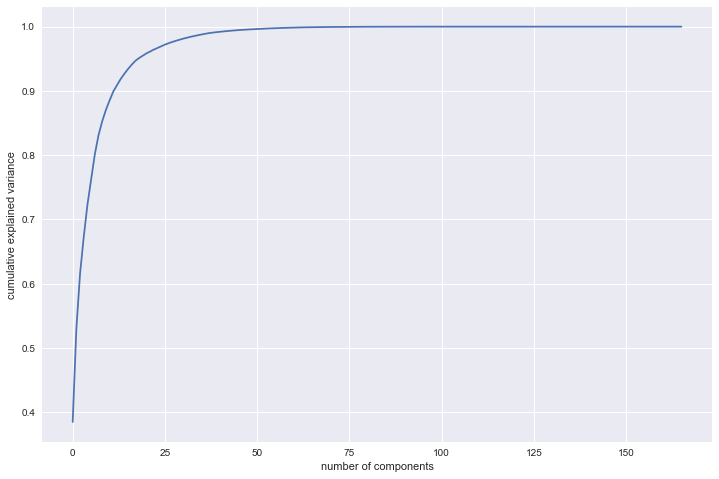

In [56]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the above plot, it is clear that we can choose upto 30 components to explain more than 95 percent of the variance

In [57]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [58]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3406, 30)

#### Creating correlation matrix for the principal components to see if there is a correlation among the components

In [59]:
corrmat = np.corrcoef(df_train_pca.transpose())

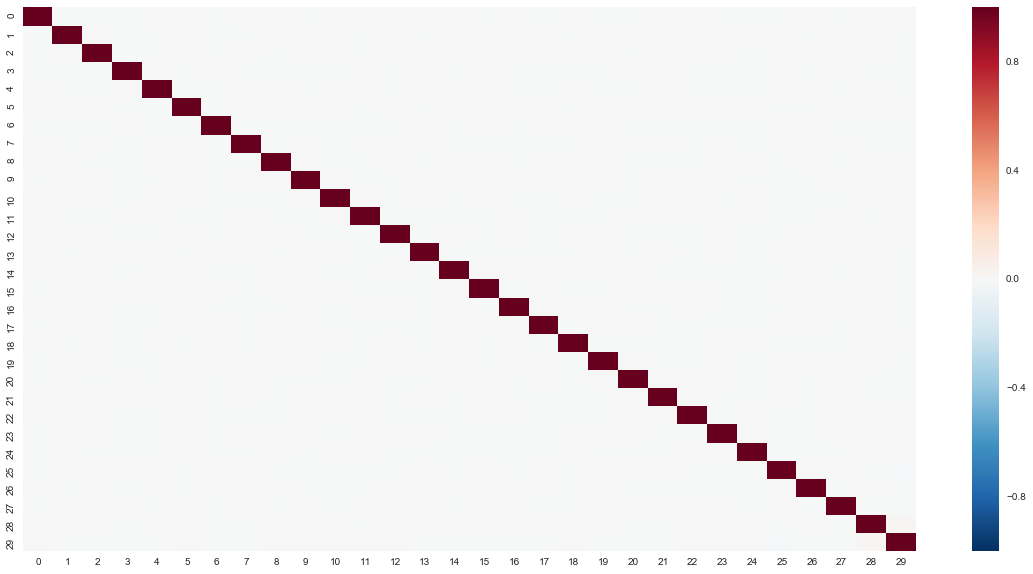

In [60]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat)
plt.show()

In [61]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.0100749607611 , min corr:  -0.00834479579691


#### we see that correlations are indeed very close to 0

In [62]:
#Applying selected components to the test data - 30 COMPONENTS
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1460, 30)

####  Let us make use of the top principal components to predict the future churners using diffrent techniques

## Logistic Regresssion

In [63]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log = LogisticRegression()
model_logistic = log.fit(df_train_pca,y_train)

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
#Making prediction on the test data
pred_test = model_logistic.predict_proba(df_test_pca)

In [65]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [66]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

In [67]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

#### Lets us calculate the AUC and optimalthreshold using ROC curve

In [68]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.83525439887100639

In [69]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [70]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
threshold

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


[0.54493009711860407]

In [71]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)

In [72]:
y_pred_final.churn.value_counts()

0    736
1    724
Name: churn, dtype: int64

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[545, 191],
       [143, 581]])

In [74]:
TN = confusion[0,0] # true positive 
TP = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.8024861878453039

In [76]:
# Let us calculate Precision
TP / float(TP+FP)

0.75259067357512954

In [77]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.259510869565


In [78]:
## Misclassification rate

(FN+FP)/(TP+TN+FP+FN)

0.22876712328767124

####  As we are looking for more sensitivity (TPR) . lets us get the cutoff, for which we get maximum sensitivity using ROC curve

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

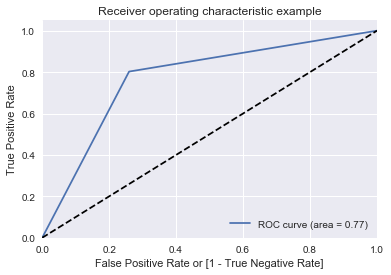

(array([ 0.        ,  0.25951087,  1.        ]),
 array([ 0.        ,  0.80248619,  1.        ]),
 array([2, 1, 0]))

In [80]:
draw_roc(y_pred_final.churn, y_pred_final.pred_churn)

In [81]:
import pandas as pd
df=pd.DataFrame({'Threshold': thresholds, 
              'TPR': tpr, 
              'FPR':fpr,
              
             })
df=df[['Threshold','FPR','TPR']]
df

,Threshold,FPR,TPR
0,0.99,0.00,0.00
1,0.97,0.00,0.01
2,0.97,0.00,0.01
3,0.97,0.00,0.01
4,0.97,0.00,0.01
5,0.96,0.00,0.04
6,0.95,0.01,0.04
7,0.95,0.01,0.05
8,0.95,0.01,0.05
9,0.95,0.01,0.05


#### From the above dataframe it is evident that by reducing the cutoff value,TPR can be increased at the cost of increased FPR(Decreased specificity)
#### Let us choose a cutoff of 0.34 and recalculate the recall and precision

In [82]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.34 else 0)

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[382, 354],
       [ 76, 648]])

In [84]:
TN = confusion[0,0] # true positive 
TP = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.89502762430939231

In [86]:
# Let us calculate Precision
TP / float(TP+FP)

0.6467065868263473

## Lets us fit a tree model and check the accuracy

In [87]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.71      0.73      0.72       736
          1       0.72      0.70      0.71       724

avg / total       0.72      0.72      0.72      1460



In [89]:
confusion_tree=confusion_matrix(y_test,y_pred_default)

In [90]:
TN = confusion_tree[0,0] # true positive 
TP = confusion_tree[1,1] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our tree model
TP / float(TP+FN)

0.70303867403314912

In [92]:
# Let us calculate Precision
TP / float(TP+FP)

0.71994342291371993

In [93]:
y_train=y_train.churn

In [94]:
########## lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [95]:
y_train.shape

(3406,)

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.01,0.00,0.65,0.66,1,{'max_depth': 1},39,0.65,0.66,0.66,0.65,0.66,0.65,0.64,0.66,0.65,0.66,0.00,0.00,0.01,0.00
1,0.02,0.00,0.72,0.72,2,{'max_depth': 2},14,0.71,0.72,0.74,0.72,0.76,0.71,0.69,0.73,0.69,0.73,0.00,0.00,0.03,0.01
2,0.03,0.00,0.74,0.76,3,{'max_depth': 3},7,0.74,0.76,0.75,0.76,0.75,0.75,0.72,0.77,0.72,0.76,0.00,0.00,0.01,0.01
3,0.04,0.00,0.74,0.78,4,{'max_depth': 4},6,0.73,0.77,0.77,0.77,0.75,0.77,0.72,0.78,0.72,0.79,0.00,0.00,0.02,0.01
4,0.04,0.00,0.75,0.81,5,{'max_depth': 5},4,0.75,0.81,0.76,0.80,0.78,0.81,0.74,0.81,0.72,0.81,0.00,0.00,0.02,0.00


/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


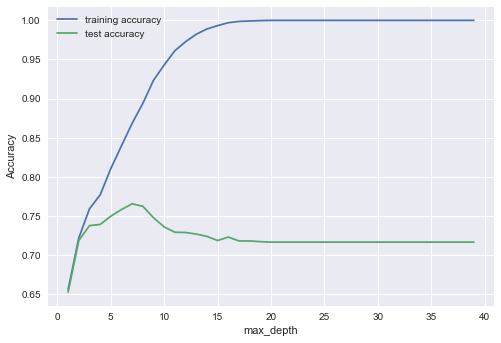

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [98]:
## if max depth increases more than 6, the test accuracy decreases.so choosing Max depth = 5
## Lets tune min sample leaf

In [99]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [100]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.08,0.00,0.73,0.92,5,{'min_samples_leaf': 5},9,0.72,0.92,0.73,0.92,0.76,0.92,0.73,0.92,0.72,0.92,0.00,0.00,0.02,0.00
1,0.06,0.00,0.76,0.83,25,{'min_samples_leaf': 25},1,0.76,0.83,0.75,0.82,0.80,0.82,0.74,0.83,0.74,0.83,0.00,0.00,0.02,0.00
2,0.05,0.00,0.75,0.80,45,{'min_samples_leaf': 45},2,0.74,0.80,0.76,0.80,0.78,0.80,0.74,0.81,0.72,0.81,0.00,0.00,0.02,0.00
3,0.05,0.00,0.74,0.79,65,{'min_samples_leaf': 65},4,0.74,0.78,0.76,0.79,0.76,0.78,0.73,0.80,0.73,0.79,0.00,0.00,0.01,0.01
4,0.04,0.00,0.74,0.78,85,{'min_samples_leaf': 85},7,0.73,0.78,0.76,0.77,0.76,0.78,0.73,0.79,0.73,0.78,0.00,0.00,0.01,0.00


/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


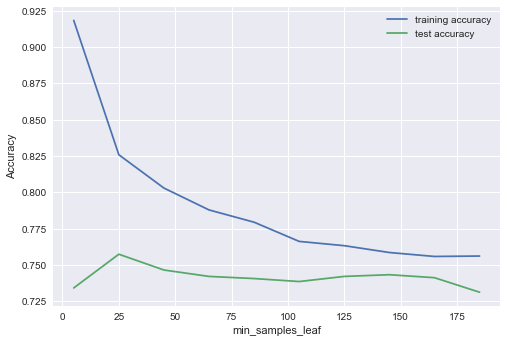

In [101]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
##You can see that at low values of min_samples_leaf, the tree gets a bit overfitted.
#At values > 110, however, the model becomes more stable and the training and test accuracy start to converge

In [103]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [104]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.09,0.00,0.72,0.98,5,{'min_samples_split': 5},10,0.74,0.98,0.72,0.98,0.73,0.99,0.71,0.99,0.71,0.98,0.00,0.00,0.01,0.00
1,0.09,0.00,0.74,0.90,25,{'min_samples_split': 25},9,0.73,0.89,0.73,0.90,0.76,0.90,0.74,0.90,0.71,0.90,0.00,0.00,0.02,0.00
2,0.09,0.00,0.75,0.86,45,{'min_samples_split': 45},2,0.76,0.86,0.75,0.85,0.77,0.87,0.75,0.85,0.71,0.87,0.00,0.00,0.02,0.01
3,0.09,0.00,0.75,0.84,65,{'min_samples_split': 65},1,0.76,0.84,0.75,0.84,0.77,0.84,0.74,0.84,0.72,0.85,0.00,0.00,0.02,0.00
4,0.08,0.00,0.74,0.83,85,{'min_samples_split': 85},3,0.75,0.82,0.74,0.83,0.78,0.83,0.73,0.83,0.72,0.84,0.00,0.00,0.02,0.01


/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


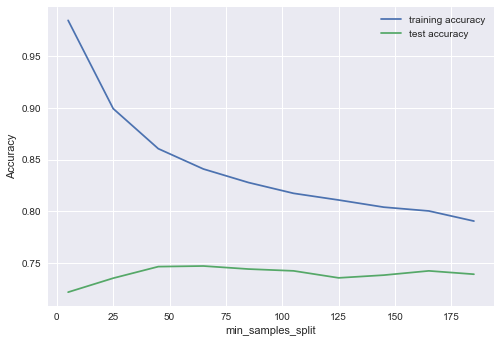

In [105]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Lets find the optimal parameters with grid search

In [106]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(50, 150, 50), 'max_depth': range(5, 15, 5), 'criterion': ['entropy', 'gini'], 'min_samples_split': range(50, 150, 50)},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [107]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.06,0.00,0.75,0.79,entropy,5,50,50,"{'min_samples_leaf': 50, 'criterion': 'entropy...",1,0.74,0.80,0.78,0.79,0.78,0.79,0.74,0.79,0.73,0.80,0.00,0.00,0.02,0.00
1,0.06,0.00,0.75,0.79,entropy,5,50,100,"{'min_samples_leaf': 50, 'criterion': 'entropy...",1,0.74,0.80,0.78,0.79,0.78,0.79,0.74,0.79,0.73,0.80,0.00,0.00,0.02,0.00
2,0.05,0.00,0.74,0.77,entropy,5,100,50,"{'min_samples_leaf': 100, 'criterion': 'entrop...",9,0.74,0.77,0.77,0.77,0.76,0.76,0.73,0.78,0.71,0.77,0.00,0.00,0.02,0.01
3,0.06,0.00,0.74,0.77,entropy,5,100,100,"{'min_samples_leaf': 100, 'criterion': 'entrop...",9,0.74,0.77,0.77,0.77,0.76,0.76,0.73,0.78,0.71,0.77,0.00,0.00,0.02,0.01
4,0.07,0.00,0.75,0.80,entropy,10,50,50,"{'min_samples_leaf': 50, 'criterion': 'entropy...",5,0.76,0.81,0.77,0.80,0.77,0.80,0.74,0.80,0.71,0.81,0.00,0.00,0.02,0.00


In [108]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.753376394598
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [109]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [110]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[510, 226],
       [202, 522]])

In [111]:
TN = confusion_tree_hyper[0,0] # true positive 
TP = confusion_tree_hyper[1,1] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

##NOTE : There is an increment in the sensitivity after tuning the hyperparameters from 0.73 to 0.75

0.72099447513812154

In [113]:
# Let us calculate Precision
TP / float(TP+FP)

0.69786096256684493

## Lets try and build random forest and see if it increases the sensitivity

In [114]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [115]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[573, 163],
       [196, 528]])

In [116]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our random forest model
TP / float(TP+FN)


0.72928176795580113

In [118]:
# Let us calculate Precision
TP / float(TP+FP)

0.76410998552821996

In [119]:
print(accuracy_score(y_test,y_pred_default))

0.754109589041


## Grid search to find optimal hyper parameters - Random forest

In [120]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   50.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 200), 'max_features': [5, 10], 'max_depth': [4, 8, 10], 'n_estimators': [100, 200, 300], 'min_samples_split': range(200, 500, 200)},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [121]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.781855549031 using {'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 8, 'n_estimators': 300, 'min_samples_split': 200}


In [122]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

In [123]:
# fit
rfc.fit(df_train_pca,y_train)

# predict
y_pred_default = rfc.predict(df_test_pca)

In [124]:
# Making predictions
y_pred_default = rfc.predict(df_test_pca)

confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[549, 187],
       [179, 545]])

In [125]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our random forest model
TP / float(TP+FN)

##NOTE : There is an increment in the sensitivity after tuning the hyperparameters  -  0.729 to 0.754

0.75276243093922657

In [127]:
# Let us calculate Precision
TP / float(TP+FP)

0.74453551912568305

## Lets fit a SVM model

In [128]:
from sklearn.svm import SVC
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   48.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [129]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.825895478567 using {'gamma': 0.01, 'C': 1000}


In [130]:
# upon trying rbf, poly and linear. Linear is giving the best results.
model = SVC(C=1000, gamma=0.01, kernel="linear")
model.fit(df_train_pca,y_train)
y_pred_default = model.predict(df_test_pca)

confusion_SVM_hyper=confusion_matrix(y_test,y_pred_default)
confusion_SVM_hyper

array([[557, 179],
       [138, 586]])

In [131]:
TN = confusion_SVM_hyper[0,0] # true positive 
TP = confusion_SVM_hyper[1,1] # true negatives
FP = confusion_SVM_hyper[0,1] # false positives
FN = confusion_SVM_hyper[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our SVM model
TP / float(TP+FN)


0.80939226519337015

In [133]:
# Let us calculate Precision
TP / float(TP+FP)

0.76601307189542489

## Let us fit a XG-Boost model

In [134]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [135]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(df_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [136]:
y_pred_default = model.predict(df_test_pca)

confusion_XGBoost=confusion_matrix(y_test,y_pred_default)
confusion_XGBoost

array([[553, 183],
       [146, 578]])

In [137]:
TN = confusion_XGBoost[0,0] # true positive 
TP = confusion_XGBoost[1,1] # true negatives
FP = confusion_XGBoost[0,1] # false positives
FN = confusion_XGBoost[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our SVM model
TP / float(TP+FN)

0.7983425414364641

In [139]:
# Let us calculate Precision
TP / float(TP+FP)

0.75952693823915896

In [140]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': [4,8,10]}          


# specify model
xgb_model = XGBClassifier(max_depth=5, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [141]:
# fit the model
model_cv.fit(df_train_pca,y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.6], 'max_depth': [4, 8, 10], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [142]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.75,0.01,0.87,1.00,0.20,4,0.30,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",9,0.88,1.00,0.87,1.00,0.86,1.00,0.01,0.00,0.01,0.00
1,1.12,0.01,0.88,1.00,0.20,4,0.60,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",6,0.89,1.00,0.87,1.00,0.86,1.00,0.02,0.00,0.01,0.00
2,1.25,0.01,0.88,1.00,0.20,4,0.90,"{'learning_rate': 0.2, 'max_depth': 4, 'subsam...",4,0.89,1.00,0.88,1.00,0.86,1.00,0.01,0.00,0.01,0.00
3,1.17,0.02,0.87,1.00,0.20,8,0.30,"{'learning_rate': 0.2, 'max_depth': 8, 'subsam...",11,0.88,1.00,0.88,1.00,0.85,1.00,0.00,0.00,0.01,0.00
4,2.00,0.02,0.88,1.00,0.20,8,0.60,"{'learning_rate': 0.2, 'max_depth': 8, 'subsam...",3,0.89,1.00,0.89,1.00,0.86,1.00,0.16,0.00,0.02,0.00
5,2.24,0.02,0.88,1.00,0.20,8,0.90,"{'learning_rate': 0.2, 'max_depth': 8, 'subsam...",1,0.89,1.00,0.88,1.00,0.86,1.00,0.17,0.00,0.01,0.00
6,1.15,0.02,0.87,1.00,0.20,10,0.30,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",12,0.88,1.00,0.86,1.00,0.85,1.00,0.05,0.00,0.01,0.00
7,1.93,0.02,0.88,1.00,0.20,10,0.60,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",5,0.89,1.00,0.88,1.00,0.85,1.00,0.07,0.00,0.02,0.00
8,2.36,0.02,0.88,1.00,0.20,10,0.90,"{'learning_rate': 0.2, 'max_depth': 10, 'subsa...",2,0.90,1.00,0.88,1.00,0.86,1.00,0.04,0.00,0.01,0.00
9,0.72,0.01,0.83,1.00,0.60,4,0.30,"{'learning_rate': 0.6, 'max_depth': 4, 'subsam...",18,0.84,1.00,0.83,1.00,0.82,1.00,0.01,0.00,0.01,0.00


In [143]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.881089098559 using {'learning_rate': 0.2, 'max_depth': 8, 'subsample': 0.9}


In [144]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
# fit the model
model.fit(df_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.9},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [145]:
y_pred_default = model.predict(df_test_pca)

confusion_XGBoost_hyper=confusion_matrix(y_test,y_pred_default)
confusion_XGBoost_hyper

array([[553, 183],
       [146, 578]])

In [146]:
TN = confusion_XGBoost_hyper[0,0] # true positive 
TP = confusion_XGBoost_hyper[1,1] # true negatives
FP = confusion_XGBoost_hyper[0,1] # false positives
FN = confusion_XGBoost_hyper[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our SVM model
TP / float(TP+FN)

0.7983425414364641

In [148]:
# Let us calculate Precision
TP / float(TP+FP)

0.75952693823915896

## Predictor Conclusion
We hve assesed the suitability of multiple models such as 
1. Random Forest
2. SVM
3. Logistic Regression
4. Decision Trees

In addition, we have also performed a XGboosting to improve the accuracy and recall.

In the end, we find SVM and Logistic regression produces more or less the same kind of results. We may use eiother one of them for prediction.

# Finding Important Variables

## Variable Importance Using Random Forest and Undersampling

In [149]:
## Since the classes are imbalanced, lets make use of undersampling technique to balance the class

from imblearn.under_sampling import RandomUnderSampler

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
y_resampled=pd.DataFrame(y_resampled)
# Renaming the column 
y_resampled= y_resampled.rename(columns={ 0 : 'churn'})
X_resampled=pd.DataFrame(X_resampled,columns=X.columns)

In [150]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, train_size=0.7,test_size=0.3,random_state=100)


In [151]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/skl

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.5s
/User

[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   48.4s finished
/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 200), 'max_features': [5, 10], 'max_depth': [4, 8, 10], 'n_estimators': [100, 200, 300], 'min_samples_split': range(200, 500, 200)},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [152]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.826776277158 using {'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 10, 'n_estimators': 100, 'min_samples_split': 200}


In [153]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [154]:
# fit
rfc.fit(X_train,y_train)

/Users/ragsr06/datascience/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
# predict
predictions = rfc.predict(X_test)

In [156]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_test, predictions )
confusion

array([[635, 101],
       [169, 555]])

In [157]:
TN = confusion[0,0] # true positive 
TP = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.76657458563535907

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.86277173913043481

In [160]:
## Misclassification rate

(FN+FP)/(TP+TN+FP+FN)

0.18493150684931506

In [161]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_resampled.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [162]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=30
n_items = take(n, dic.items())

## Important variables conclusion

We have performed random forest classification to identify the top variables which have a greater impact on the churn probability

# Analysis of Important Variables

We have a list of top 30 variables which have high importance from the above analysis. Let us analyse top 15 of these one by one

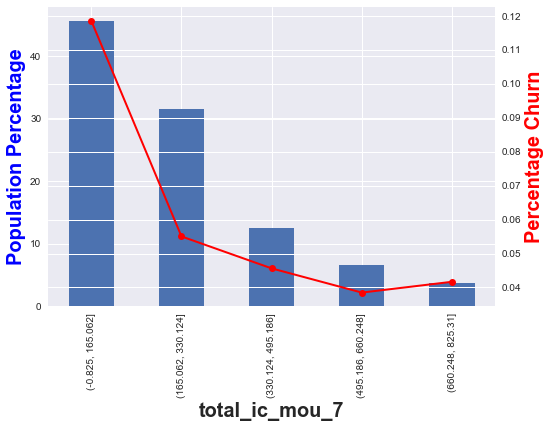

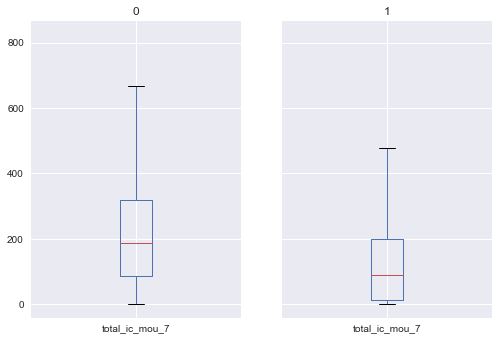

In [163]:
explore_vaiables_and_churn(tc_1.copy(),'total_ic_mou_7',5)

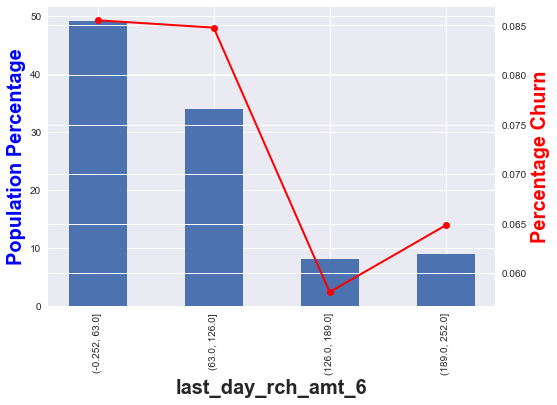

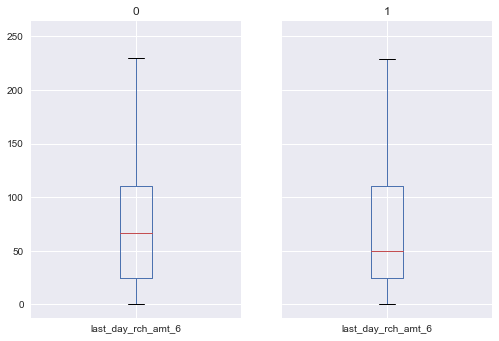

In [164]:
explore_vaiables_and_churn(tc_1.copy(),'last_day_rch_amt_6',4)

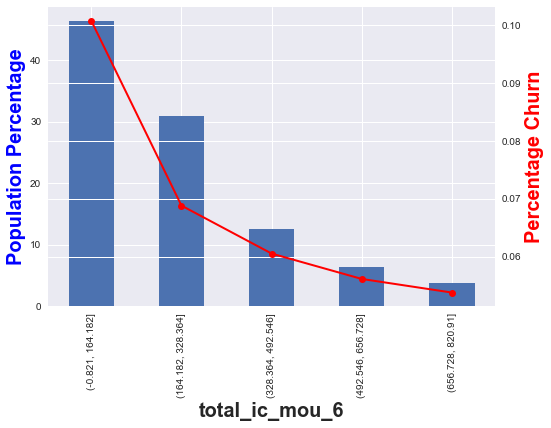

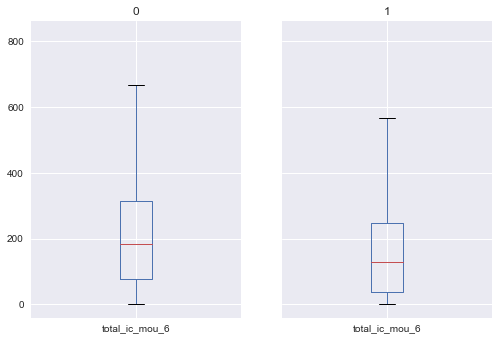

In [165]:
explore_vaiables_and_churn(tc_1.copy(),'total_ic_mou_6',5)

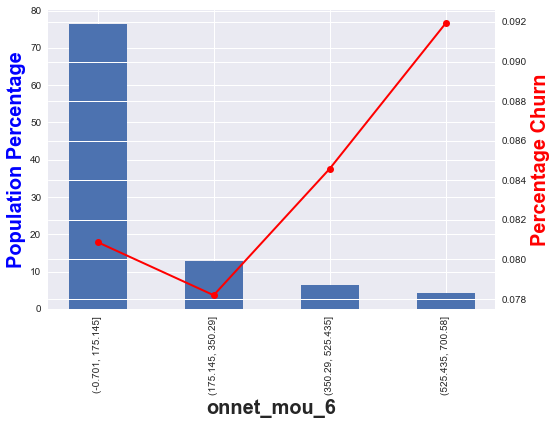

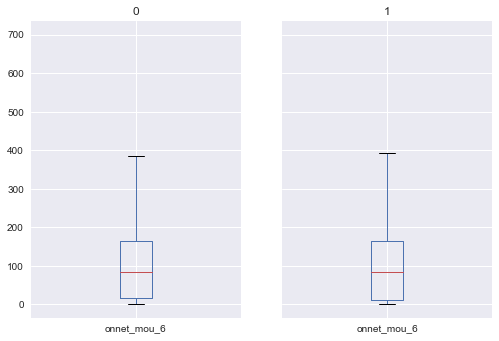

In [166]:
explore_vaiables_and_churn(tc_1.copy(),'onnet_mou_6',4)

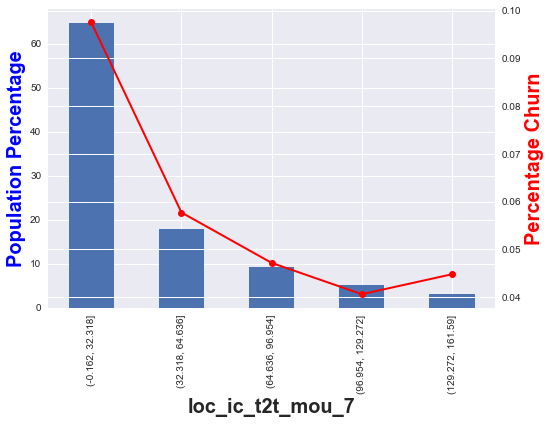

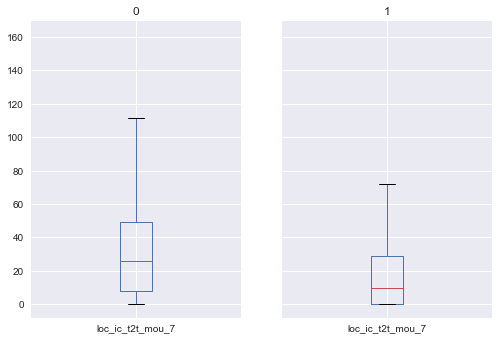

In [167]:
explore_vaiables_and_churn(tc_1.copy(),'loc_ic_t2t_mou_7',5)

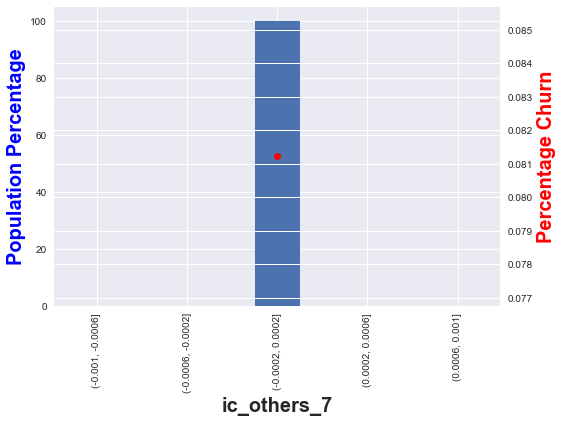

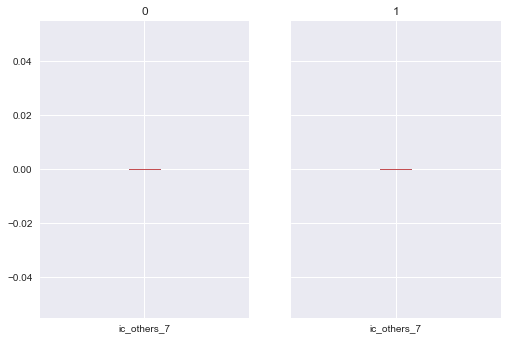

In [168]:
explore_vaiables_and_churn(tc_1.copy(),'ic_others_7',5)

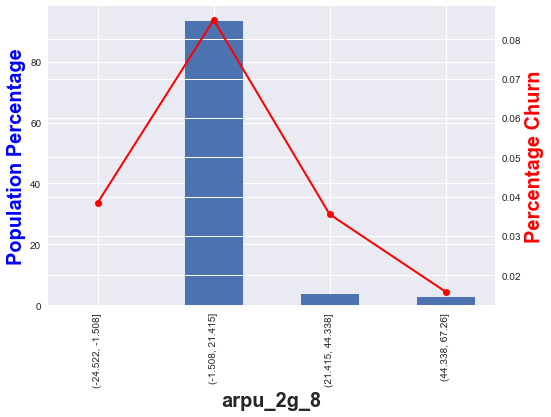

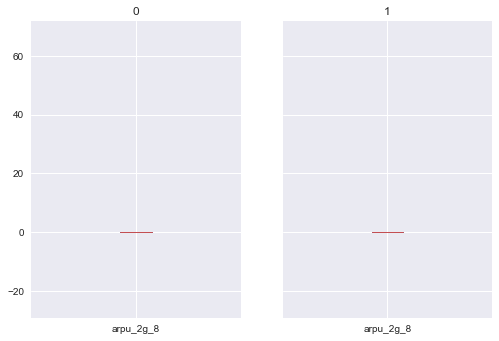

In [169]:
explore_vaiables_and_churn(tc_1.copy(),'arpu_2g_8',4)

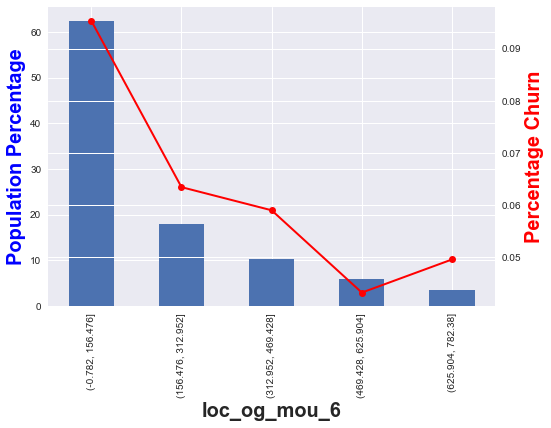

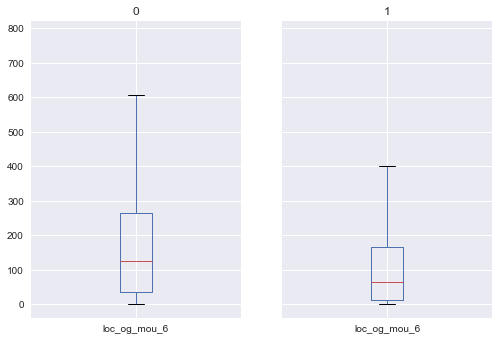

In [170]:
explore_vaiables_and_churn(tc_1.copy(),'loc_og_mou_6',5)

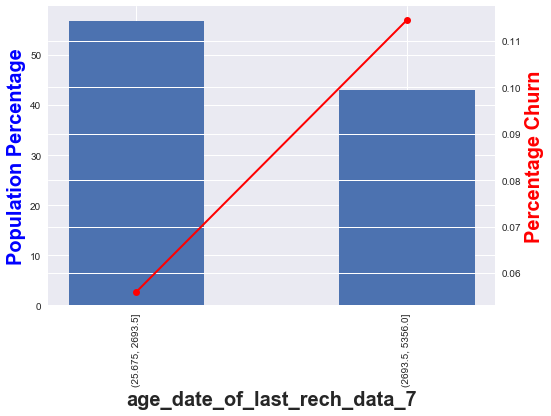

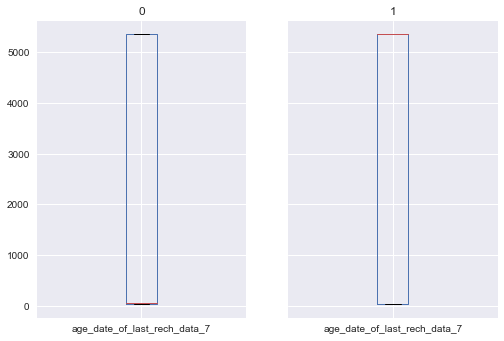

In [171]:
explore_vaiables_and_churn(tc_1.copy(),'age_date_of_last_rech_data_7',2)

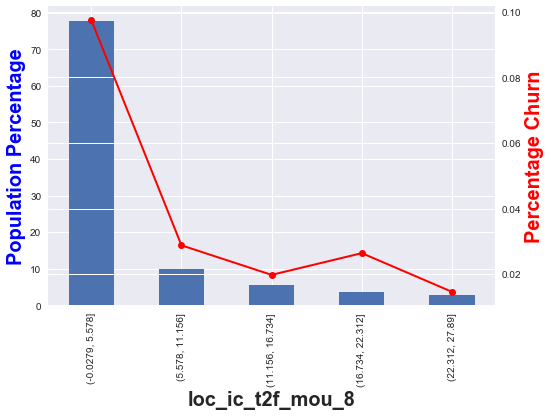

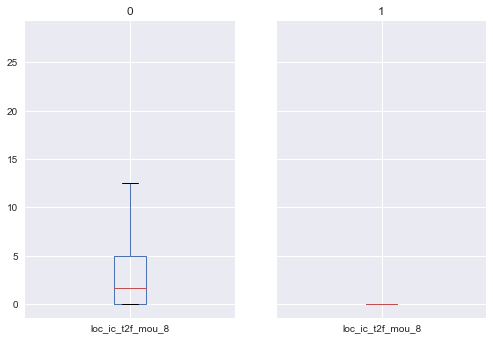

In [172]:
explore_vaiables_and_churn(tc_1.copy(),'loc_ic_t2f_mou_8',5)

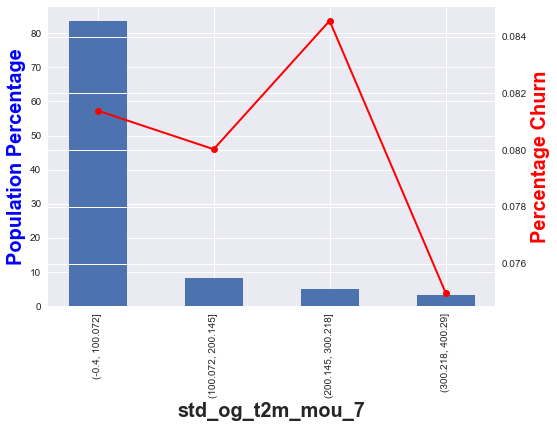

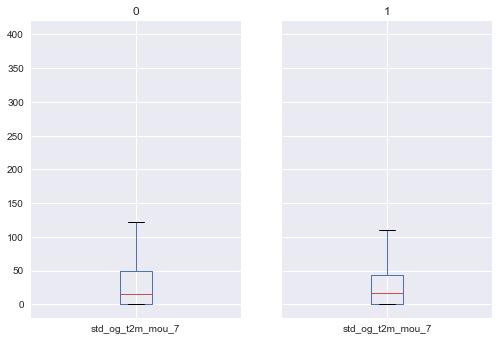

In [173]:
explore_vaiables_and_churn(tc_1.copy(),'std_og_t2m_mou_7',4)

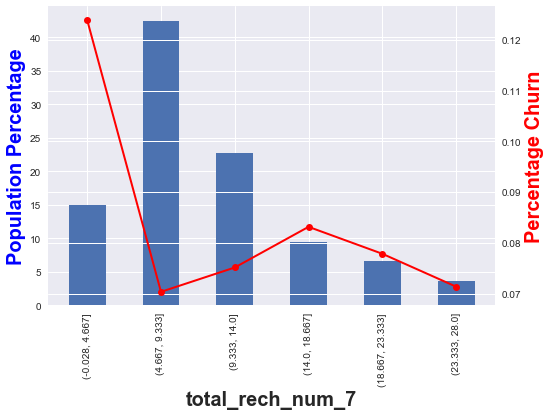

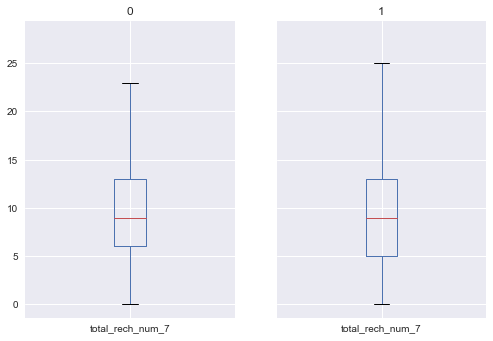

In [174]:
explore_vaiables_and_churn(tc_1.copy(),'total_rech_num_7',6)

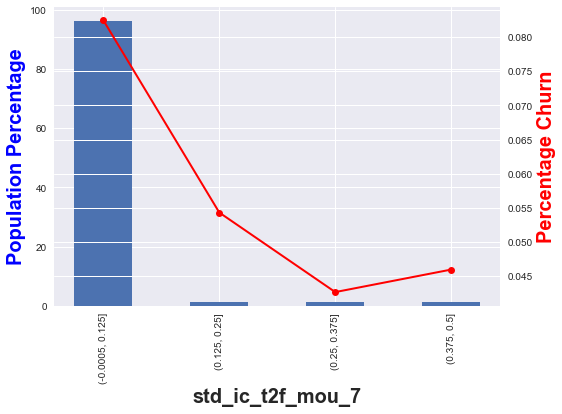

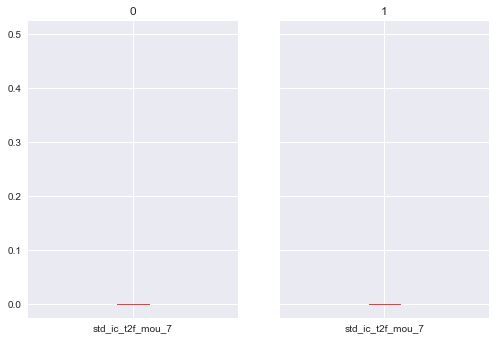

In [175]:
explore_vaiables_and_churn(tc_1.copy(),'std_ic_t2f_mou_7',4)

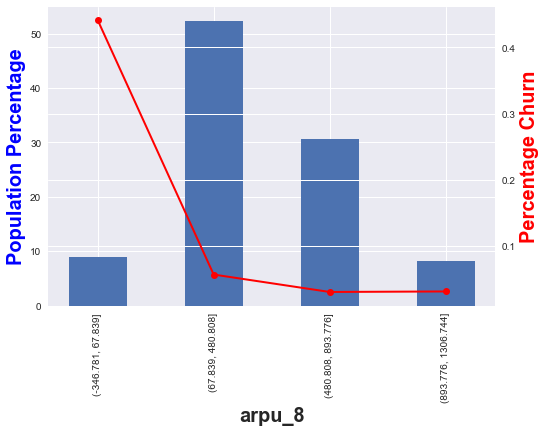

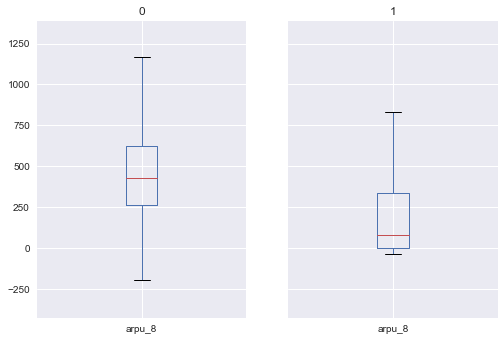

In [176]:
explore_vaiables_and_churn(tc_1.copy(),'arpu_8',4)

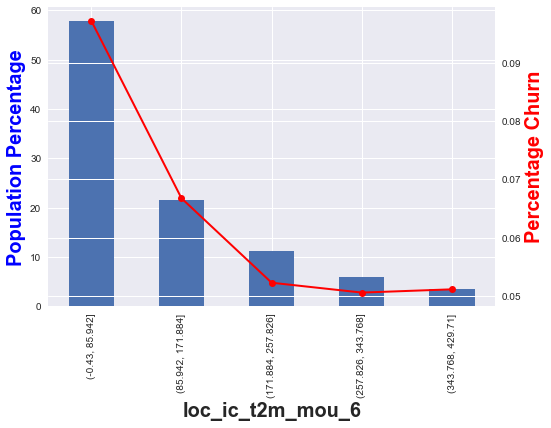

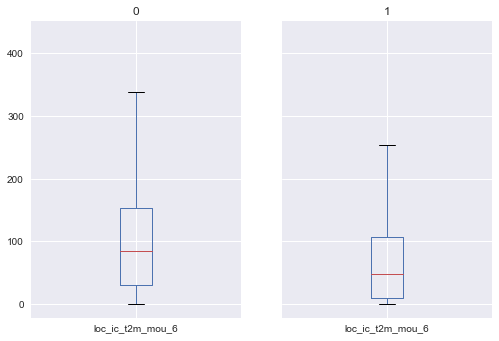

In [177]:
explore_vaiables_and_churn(tc_1.copy(),'loc_ic_t2m_mou_6',5)

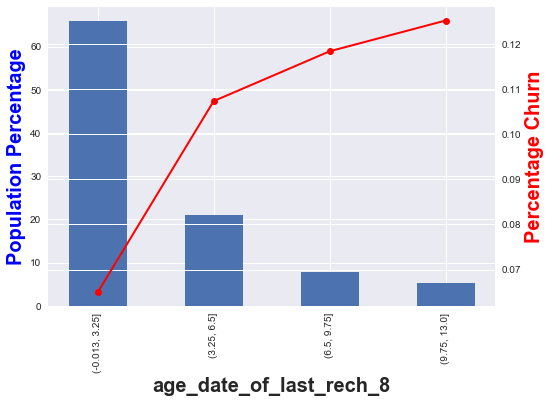

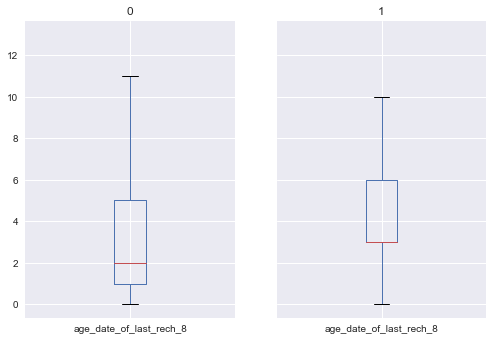

In [178]:
explore_vaiables_and_churn(tc_1.copy(),'age_date_of_last_rech_8',4)


# Analysis & Recommendations

Telecom is an industry where we see a significant churn in the customers from one provider to another provider. The main reason for this is very low switching cost.
1. The customer may just stop using the phone OR
2. They can simple port to another service provider

Most of the people just switch because of a better offer from a competing provider. In the above analysis we find clear patterns. Consider some of the top 15 variables below:
* total_ic_mou_7
* total_ic_mou_6
* loc_ic_t2t_mou_7
* ic_others_7
* arpu_2g_8
* loc_og_mou_6
* age_date_of_last_rech_data_7
* loc_ic_t2f_mou_8
* std_og_t2m_mou_7
* total_rech_num_7
* std_ic_t2f_mou_7
* arpu_8
* loc_ic_t2m_mou_6

if we split each of these variables in 5 bins, we see that the maximum churn happens in the first bin. These are the customers who churn given a better offer from other providers.

Also, consider the below age-related variables:
* age_recharge
* age_recharge_and_data
* age_date_of_last_rech_8

If we split the age varaibles into 4 bins, we see that the maximum bin happens in the 4th bin. As there is a prolonged delay in the next recharge, we see that there is an increase in the churn rate.

Also, with respect to the data, we see that many customers use dual sim mobile phones. One as their permanent number and another exclusively for a data offer. When they see that a competitor is providing a better offer, they simply buy a new prepaid connection from this new provider.

### Retaining vs acquiring new customers

Telecom industry is highly capital intensive. It requires significant upfront investment on setting up the infrastructure. Once the infrastructure is ready, we see that there is no significant cost involved based on the number of calls or the amount of data which is offered to its customers.

We also see that, in order to retain an existing customer, all that a provider has to do is to ensure that they send out periodic offers to them so that they are happy with the offers provided to them as compared to the competitors.
However, acquiring new customers is a different ball game all together. The operator may have do a significant marketing investment and promote its offers to attract new customers.

We can easily conclude that it is easier and more cost effective to retain existing customers than to acquire new customers.

### Recommendation

1. Focus on the first bin of the customers (when split into 5 bins)- Since the highest churn happens in the first bin when split into 5 bins, the company needs to focus its customer retention efforts in this category. Send periodic new offer updates and special offers to existing customers in the first bin. Also note that maximum population falls in the first bin category
2. Approach when there is a recharge delay - When you see that the age of last recharge is increasing, send out targeted email/sms campaign offers to customers.